In [ ]:
# libraries
import os
import pandas as pd
import openpyxl
import xlrd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
import locale # Import the locale module
from matplotlib.ticker import FuncFormatter


In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#Carga de las bases de datos

In [ ]:
# Leer los archivos

file_path = '/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte-OEL/ReporteCompleto_20250519_161701.xlsx'
df = pd.read_excel(file_path)


In [ ]:
productividad = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte-OEL/Productividad_2025-02-10.xlsx')

In [ ]:
estados = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte-OEL/Estados.xlsx')
sexos = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte-OEL/Sexos.xlsx')
edad = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte-OEL/RangoEdad.xlsx')
talento_humano = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte-OEL/TalentoHumano.xlsx')
sector = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte-OEL/Sector.xlsx')
institucion = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte-OEL/Institucion.xlsx')

"""
# Cargar los datos desde un archivo CSV
df = pd.read_csv('ruta/a/tu/archivo.csv')  # Reemplaza con la ruta a tu archivo
"""

"\n# Cargar los datos desde un archivo CSV\ndf = pd.read_csv('ruta/a/tu/archivo.csv')  # Reemplaza con la ruta a tu archivo\n"

Funciones de la Librería LuisCorp

In [ ]:
#-----------------------------------------------------------------------------------------------------------
#--------------------------------FUNCIONES PARA LA LIBRERÍA LUISCORP------------------------------------------
#-----------------------------------------------------------------------------------------------------------

# Función para cambiar separador de décimas a formato español
def cambiar_separador(numero):
    numero_str = str(numero)
    if '.' in numero_str:
        numero_str = numero_str.replace('.', ',')
    return numero_str

# Función para cambiar el formato de separadores de miles de anglosajón a español
def cambiar_separadores(numero):
    numero_str = str(numero)
    if ',' in numero_str:
        numero_str = numero_str.replace(',', '.')
    return numero_str

# Función para cambiar separador de miles a formato español
def colocar_separador_miles(numero):
    if numero >= 1000:
        # Formatear el número con separadores de miles
        return "{:,.0f}".format(numero).replace(",", ".")
    else:
        return str(numero)

# Función para agrupar edades de acuerdo a lo mostrado por la página del OEL
def agrupar_edades(edad):
    if edad >= 0 and edad < 15:
        return '0-14'
    elif edad >= 15 and edad < 25:
        return '15-24'
    elif edad >= 25 and edad < 35:
        return '25-34'
    elif edad >= 35 and edad < 45:
        return '35-44'
    elif edad >= 45 and edad < 55:
        return '45-54'
    elif edad >= 55 and edad < 65:
        return '55-64'
    elif edad >= 65 and edad < 75:
        return '65-74'
    elif edad >= 75 and edad < 85:
        return '75-84'
    elif edad >= 85 and edad < 95:
        return '85-94'
    elif edad >= 95:
        return '95 en adelante'

# Función para generar colores degradados
def generate_gradient_colors(base_color, num_colors):
    base_color = np.array(base_color) / 255
    gradient = [base_color * (1 - (num_colors - i)/num_colors) for i in range(1, num_colors+1)]
    return gradient

# Función para formatear el porcentaje con coma como separador de decimales
def formatear_porcentaje(x, pos):
    return f'{x:.0f} %'.replace('.', ',')

# Función para comparar a través de los índices dos dataframes
def compare_dataframes(df1, df2, columns):
    comparison_result = pd.DataFrame(index=df1.index)
    for column in columns:
        comparison_result[column + '_Diff'] =  df2[column] - df1[column]

    return comparison_result

# Función que toma las columnas a filtrar de un dataframe y toma los valores de las mismas que se desean visualizar, para devolver un dataframe filtrado.
def filtro_registros(dataframe, columnas_a_filtrar):
    for columna, valor in columnas_a_filtrar.items():
        df_filtrado = df[df[columna] == valor]
    return df_filtrado

# Función para crear un diccionario a partir de una cantidad de items especificadas, así como los valores asignados a los mismos
def crear_diccionario(items, values):
    """
    Crea un diccionario a partir de una lista de claves y una lista de valores.

    Args:
        items: Una lista de claves para el diccionario.
        values: Una lista de valores para el diccionario.

    Returns:
        Un diccionario con las claves y valores proporcionados, o None si las listas no tienen la misma longitud.
    """
    if len(items) != len(values):
        print("Error: Las listas de claves y valores deben tener la misma longitud.")
        return None

    new_dict = dict(zip(items, values))
    return new_dict

# Función para crear listas a partir de un valor ingresado por teclado de la longitud de la lista, para posteriormente ingresar por teclado la lista que puede de caracteres o números
def crear_lista_por_teclado():
    """Creates a list based on user input for length and elements."""

    try:
        list_length = int(input("Enter the desired length of the list: "))
        if list_length <= 0:
            print("List length must be a positive integer.")
            return None

        my_list = []
        for i in range(list_length):
            element = input(f"Enter element {i+1}: ")
            try:
                # Try converting to number (int or float)
                element = int(element)
            except ValueError:
                try:
                    element = float(element)
                except ValueError:
                    pass  # Keep as string if not a number

            my_list.append(element)
        return my_list
    except ValueError:
        print("Invalid input. Please enter a valid integer for the list length.")
        return None


# Función que permite obtener otro dataframe filtrado que muestre los registros hechos entre dos fechas indicadas de la columna 'Fecha de Registro'
def filter_by_date(df, start_date, end_date):
    """
    Filters a DataFrame by the 'Fecha de Registro' column between two dates.

    Args:
        df: The input DataFrame.
        start_date: The start date for filtering (YYYY-MM-DD).
        end_date: The end date for filtering (YYYY-MM-DD).

    Returns:
        A new DataFrame containing only the rows within the specified date range,
        or None if 'Fecha de Registro' column is not found or dates are invalid.
    """
    if 'Fecha de Registro' not in df.columns:
        print("Error: 'Fecha de Registro' column not found in DataFrame.")
        return None

    try:
        # Convert date strings to datetime objects
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        # Ensure 'Fecha de Registro' column is in datetime format
        df.loc[:, 'Fecha de Registro'] = pd.to_datetime(df['Fecha de Registro'])
    except ValueError:
        print("Error: Invalid date format. Use YYYY-MM-DD.")
        return None

    # Filter the DataFrame
    filtered_df = df[(df['Fecha de Registro'] >= start_date) & (df['Fecha de Registro'] <= end_date)]
    return filtered_df







# Análisis Exploratorio de las bases de datos (EDA)

In [ ]:
df

,Nro,Nacionalidad,Cedula de identidad,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Sexo,Estado Civil,...,Organismo financiero,Tipo de financiamiento,Monto otorgado,Posee patente,Modalidad,Sub-modalidad,Número de registro,Modalidad2,Sub-modalidad3,Número de registro4
0,1,V,16231605,Fabio,Enrique,Parra,Posada,41,MASCULINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
1,2,V,13209798,MARIA,ALEJANDRA,DUGARTE,DE JUAREZ,48,FEMENINO,CASADO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
2,3,V,5977576,WIDO,JOSE,MARTINEZ,PEREZ,59,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
3,4,V,9681910,Romny,Jose,Yeguez,Mass,54,MASCULINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,5,V,29835485,Mariangel,Del Valle,Dominguez,Exttingeltt,22,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62286,62287,V,13542172,Gustavo,Eduardo,Parra,Leonett,47,MASCULINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62287,62288,V,14955863,Darimer,Isabel,Ordoñez,Montilla,42,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62288,62289,V,21456206,Genesis,De Lourdes,Cardozo,Arias,32,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62289,62290,V,16766324,Renny,Miguel,Ortega,Garcia,47,MASCULINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mostrar las primeras filas del DataFrame
"""
print("Primeras filas del DataFrame:")
print(df.head())
"""

'\nprint("Primeras filas del DataFrame:")\nprint(df.head())\n'

In [ ]:
# Mostrar información general del DataFrame, la cual dice la cantidad de valores registrados dentro de cada columna, así como el tipo de variable
print("\nInformación general del DataFrame:")
print(df.info())



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62291 entries, 0 to 62290
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Nro                                    62291 non-null  int64  
 1   Nacionalidad                           62291 non-null  object 
 2   Cedula de identidad                    62291 non-null  int64  
 3   Primer Nombre                          62291 non-null  object 
 4   Segundo Nombre                         60037 non-null  object 
 5   Primer Apellido                        62291 non-null  object 
 6   Segundo Apellido                       58464 non-null  object 
 7   Edad                                   62291 non-null  int64  
 8   Sexo                                   62291 non-null  object 
 9   Estado Civil                           62291 non-null  object 
 10  Estado                            

In [ ]:
# Mostrar estadísticas descriptivas de la columna 'Edad' dentro del dataframe 'df'
print("\nEstadísticas descriptivas:")
print(df['Edad'].describe())



Estadísticas descriptivas:
count    62291.000000
mean        44.045673
std         14.176624
min          0.000000
25%         33.000000
50%         44.000000
75%         54.000000
max        119.000000
Name: Edad, dtype: float64


In [ ]:
# Visualizar la distribución de valores para cada columna numérica (histogramas)
"""
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()
"""

"\nfor column in df.select_dtypes(include=['float64', 'int64']).columns:\n    plt.figure(figsize=(10, 4))\n    sns.histplot(df[column], kde=True)\n    plt.title(f'Distribución de {column}')\n    plt.show()\n"

In [ ]:
# Visualizar la distribución de valores para cada columna categórica (histogramas)
"""
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.show()
"""

"\nfor column in df.select_dtypes(include=['object']).columns:\n    plt.figure(figsize=(10, 4))\n    sns.countplot(y=df[column], order=df[column].value_counts().index)\n    plt.title(f'Distribución de {column}')\n    plt.show()\n"

In [ ]:
# Identificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
Nro                                          0
Nacionalidad                                 0
Cedula de identidad                          0
Primer Nombre                                0
Segundo Nombre                            2254
Primer Apellido                              0
Segundo Apellido                          3827
Edad                                         0
Sexo                                         0
Estado Civil                                 0
Estado                                       0
Municipio                                    0
Parroquia                                    0
Activo                                       0
Numero Celular                               0
Numero Telefono                          19282
Correo Electronico                           0
Correo Alternativo                          26
Fecha de Registro                            0
Trabaja                                      0
Tipo Institucion                

In [ ]:
# Matriz de correlación
"""
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
"""

"\nplt.figure(figsize=(12, 8))\ncorrelation_matrix = df.corr()\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')\nplt.title('Matriz de Correlación')\nplt.show()\n"

La siguiente tabla muestra los registros con los valores de Cédula de identidad duplicados presentes en el Reporte Completo del Recitven.

In [ ]:
# Crear una copia del DataFrame
df_copy = df.copy()

# Identificar los IDs duplicados
duplicate_ids = df_copy['Cedula de identidad'].duplicated(keep=False)

# Insertar la columna 'duplicado' junto a 'Cedula de identidad'
df_copy.insert(df_copy.columns.get_loc('Cedula de identidad') + 1, 'duplicado', duplicate_ids)

# Eliminar los registros que tengan valor 'False' en la columna 'duplicado'
df_copy = df_copy[df_copy['duplicado']]

# Ordenar los valores de 'Cedula de identidad' de menor a mayor
df_copy = df_copy.sort_values(by='Cedula de identidad')

# Eliminar la columna 'duplicado'
df_copy = df_copy.drop(columns=['duplicado'])

# Exportar el DataFrame df_copy a un archivo Excel
df_copy.to_excel('registros-duplicados_CI.xlsx', index=False)

# Mostrar un mensaje de éxito
print('El DataFrame ha sido exportado exitosamente a registros-duplicados_CI.xlsx')

# Mostrar el DataFrame actualizado
df_copy


El DataFrame ha sido exportado exitosamente a registros-duplicados_CI.xlsx


,Nro,Nacionalidad,Cedula de identidad,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Sexo,Estado Civil,...,Organismo financiero,Tipo de financiamiento,Monto otorgado,Posee patente,Modalidad,Sub-modalidad,Número de registro,Modalidad2,Sub-modalidad3,Número de registro4
44061,44062,V,1,FRED,CHRISTINA,RODRÍGUEZ,ARANGUREN,70,FEMENINO,VIUDO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
427,428,E,1,SOUMAI,NaN,BARRY,NaN,27,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
31986,31987,E,2689379,MARIA,ASUNCION,OJEDA,DE MOGOLLON,78,FEMENINO,CASADO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
36700,36701,V,2689379,MARIA,ASUNCION,OJEDA,DE MOGOLLON,78,FEMENINO,CASADO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
38123,38124,V,3477080,EMMA,DOLORES,MARTINEZ,DE DELGADO,75,FEMENINO,CASADO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3741,3742,V,84281611,JULIA,NaN,SMITH,NaN,61,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
12868,12869,V,84406100,RAQUEL,NaN,DEL TORO,TORRES,45,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
31702,31703,E,84406100,RAQUEL,NaN,DEL TORO,TORRES,45,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
20709,20710,V,84488581,ANA,MARIA,MACA,NaN,52,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Código que me agrupa los registros del dataframe df por la columnas 'Estado' y 'Activo' y solo me muestra los que dentro de la columna 'Activo' tengan valor 'Activo'

# Group the DataFrame by 'Estado' and 'Activo' and filter for 'Activo' == 'Activo'
active_registros = df.groupby(['Estado', 'Activo']).size().unstack(fill_value=0)
#active_registros = active_registros[active_registros['Activo'] >0]

active_registros

Activo,Activo,Dado de baja,Fallecido,Migración
Estado,,,,
AMAZONAS,956,0,1,3
ANZOÁTEGUI,2139,0,1,15
APURE,819,0,3,5
ARAGUA,3967,6,8,85
BARINAS,1866,2,2,14
BOLÍVAR,2127,0,3,24
CARABOBO,4137,1,9,83
COJEDES,1027,3,0,4
DELTA AMACURO,385,0,0,0


In [ ]:
# Especificar las columnas y los valores por los cuales deseas filtrar
"""
para esta celda, se ingresan por teclado longitud de la lista 1 en ambas ocasiones. Se va a filtar
la columna 'Activo' con su valor 'Activo', ya que de ellos dependen el resto de celdas para funcionar
"""

items = crear_lista_por_teclado()
valores = crear_lista_por_teclado()

columnas_a_filtrar = crear_diccionario(items, valores)

"""
longitud 1 = 1
longutud 2 = 1

elemento 1 = 'Activo'
elemento 2 = 'Activo'

columnas_a_filtrar = {
    'Activo': 'Activo'
}
"""

df_filtrado = filtro_registros(df, columnas_a_filtrar)

df_filtrado

Enter the desired length of the list: 1
Enter element 1: Activo
Enter the desired length of the list: 1
Enter element 1: Activo


,Nro,Nacionalidad,Cedula de identidad,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Sexo,Estado Civil,...,Organismo financiero,Tipo de financiamiento,Monto otorgado,Posee patente,Modalidad,Sub-modalidad,Número de registro,Modalidad2,Sub-modalidad3,Número de registro4
0,1,V,16231605,Fabio,Enrique,Parra,Posada,41,MASCULINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
1,2,V,13209798,MARIA,ALEJANDRA,DUGARTE,DE JUAREZ,48,FEMENINO,CASADO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
2,3,V,5977576,WIDO,JOSE,MARTINEZ,PEREZ,59,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
3,4,V,9681910,Romny,Jose,Yeguez,Mass,54,MASCULINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,5,V,29835485,Mariangel,Del Valle,Dominguez,Exttingeltt,22,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62286,62287,V,13542172,Gustavo,Eduardo,Parra,Leonett,47,MASCULINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62287,62288,V,14955863,Darimer,Isabel,Ordoñez,Montilla,42,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62288,62289,V,21456206,Genesis,De Lourdes,Cardozo,Arias,32,FEMENINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62289,62290,V,16766324,Renny,Miguel,Ortega,Garcia,47,MASCULINO,SOLTERO/A,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
type(columnas_a_filtrar)

dict

In [ ]:
# prompt: escribe un código a fin de que coloque solo en mayúsculas el primer caracter de los valores de las columnas 'Estado Civil', 'Estado', 'Municipio', 'Parroquia', 'Tipo Institucion', 'Ocupacion', 'Nivel de Estudio', 'Profesion', 'Producto  de investigación' y 'Área' del dataframe 'df_filtrado'

# Define columns to capitalize
columns_to_capitalize = ['Estado Civil', 'Estado', 'Municipio', 'Parroquia',
                        'Tipo Institucion', 'Ocupacion', 'Nivel de Estudio',
                        'Profesion', 'Producto  de investigación', 'Área']

# Capitalize the first letter of each value in specified columns
for column in columns_to_capitalize:
    if column in df_filtrado.columns:
        df_filtrado.loc[:, column] = df_filtrado[column].astype(str).str.capitalize()

df_filtrado


,Nro,Nacionalidad,Cedula de identidad,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Sexo,Estado Civil,...,Organismo financiero,Tipo de financiamiento,Monto otorgado,Posee patente,Modalidad,Sub-modalidad,Número de registro,Modalidad2,Sub-modalidad3,Número de registro4
0,1,V,16231605,Fabio,Enrique,Parra,Posada,41,MASCULINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
1,2,V,13209798,MARIA,ALEJANDRA,DUGARTE,DE JUAREZ,48,FEMENINO,Casado/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
2,3,V,5977576,WIDO,JOSE,MARTINEZ,PEREZ,59,FEMENINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
3,4,V,9681910,Romny,Jose,Yeguez,Mass,54,MASCULINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,5,V,29835485,Mariangel,Del Valle,Dominguez,Exttingeltt,22,FEMENINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62286,62287,V,13542172,Gustavo,Eduardo,Parra,Leonett,47,MASCULINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62287,62288,V,14955863,Darimer,Isabel,Ordoñez,Montilla,42,FEMENINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62288,62289,V,21456206,Genesis,De Lourdes,Cardozo,Arias,32,FEMENINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62289,62290,V,16766324,Renny,Miguel,Ortega,Garcia,47,MASCULINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replace with your actual dates
start_date_str = '2001-04-10'
end_date_str = '2025-05-19'

filtered_df = filter_by_date(df_filtrado, start_date_str, end_date_str)

filtered_df

,Nro,Nacionalidad,Cedula de identidad,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Sexo,Estado Civil,...,Organismo financiero,Tipo de financiamiento,Monto otorgado,Posee patente,Modalidad,Sub-modalidad,Número de registro,Modalidad2,Sub-modalidad3,Número de registro4
0,1,V,16231605,Fabio,Enrique,Parra,Posada,41,MASCULINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
1,2,V,13209798,MARIA,ALEJANDRA,DUGARTE,DE JUAREZ,48,FEMENINO,Casado/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
2,3,V,5977576,WIDO,JOSE,MARTINEZ,PEREZ,59,FEMENINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
3,4,V,9681910,Romny,Jose,Yeguez,Mass,54,MASCULINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,5,V,29835485,Mariangel,Del Valle,Dominguez,Exttingeltt,22,FEMENINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62286,62287,V,13542172,Gustavo,Eduardo,Parra,Leonett,47,MASCULINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62287,62288,V,14955863,Darimer,Isabel,Ordoñez,Montilla,42,FEMENINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62288,62289,V,21456206,Genesis,De Lourdes,Cardozo,Arias,32,FEMENINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
62289,62290,V,16766324,Renny,Miguel,Ortega,Garcia,47,MASCULINO,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Renombrar los valores de Sexo
filtered_df.loc[:, 'Sexo'] = filtered_df['Sexo'].replace({'MASCULINO': 'Hombre', 'FEMENINO': 'Mujer'})

# 1. Distribución nacional de registros

### 1.1.1. Distribución Nacional de Registros del Reporte Completo (Porcentaje)

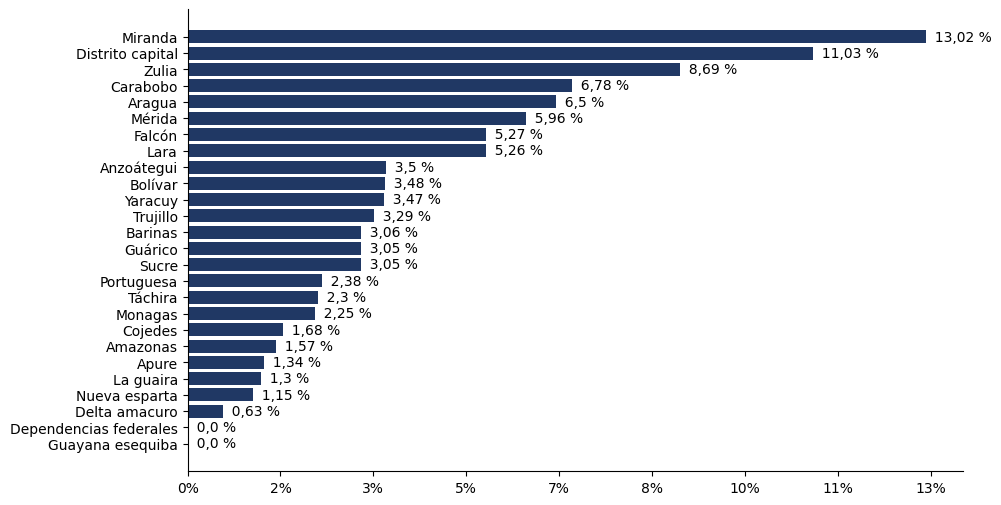

In [ ]:
# Supongamos que quieres hacer el gráfico de barras horizontales para la columna 'Estado'
columna_a_graficar = 'Estado'  # Reemplaza 'Nombre de la Columna' con el nombre de tu columna

# Contar la cantidad de valores repetidos y ordenarlos de forma descendente
conteo_valores1 = filtered_df[columna_a_graficar].value_counts().sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
bars = plt.barh(conteo_valores1.index, conteo_valores1.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

locale.setlocale(locale.LC_ALL, '')  # Set locale based on your system settings

# Formatear el eje horizontal para mostrar porcentajes
#     Calcular el total para convertir a porcentaje
total = conteo_valores1.sum()

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/total:.0%}'))

# Agregar etiquetas de datos a cada barra con porcentajes a cada barra
size=conteo_valores1.values
i=0
for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2,
          f'  {cambiar_separador(round(size[i]/sum(size)*100, 2))} %',
          ha='left', va='center')
  i+=1

# Mostrar gráfico
plt.show()


Análisis del gráfico anterior

### 1.1.2. Distribución Nacional de Registros del Reporte Completo (Valores absulutos)

Formato español aplicado


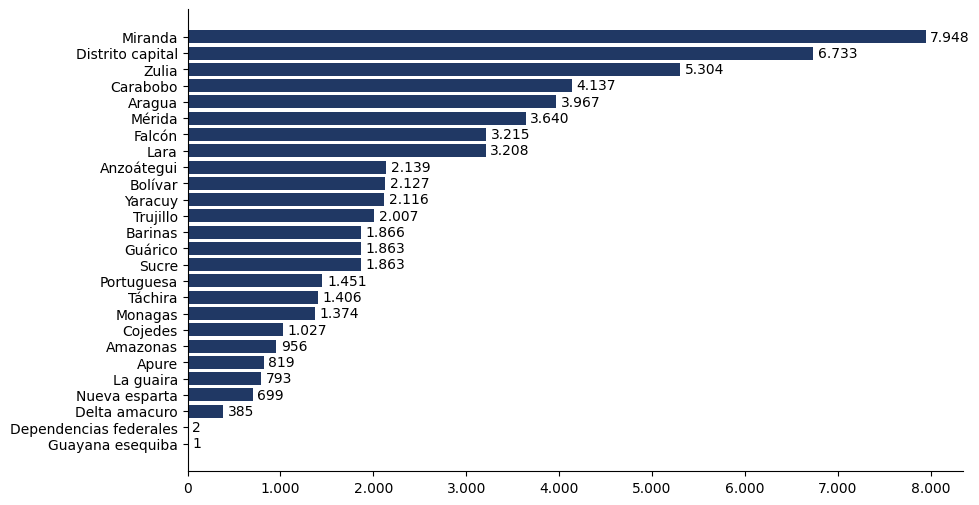

In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'Estado' es la columna a graficar
columna_a_graficar = 'Estado'  # Reemplaza 'Estado' con el nombre de tu columna

# Contar la cantidad de valores repetidos y ordenarlos de forma descendente
conteo_valores2 = filtered_df[columna_a_graficar].value_counts().sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
bars = plt.barh(conteo_valores1.index, conteo_valores2.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Configurar la localización para utilizar puntos como separadores de miles en español
try:
    locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_ALL, 'es_ES')
    except locale.Error:
        locale.setlocale(locale.LC_ALL, '')
        print("Formato español aplicado")

# Formatear el eje horizontal para mostrar separadores de miles
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: cambiar_separadores(locale.format_string("%d", int(x), grouping=True))))

# Parámetro para ajustar la distancia de las etiquetas
padding = 50  # Ajusta este valor según lo necesites

# Agregar etiquetas de datos a cada barra con separadores de miles
for bar in bars:
    width = bar.get_width()
    plt.text(width + padding, bar.get_y() + bar.get_height()/2,
             cambiar_separadores(locale.format_string("%d", int(width), grouping=True)),
             ha='left', va='center')

# Mostrar gráfico
plt.show()


Análisis del gráfico anterior

## 1.2. Distribución Nacional de Registros de la página del OEL

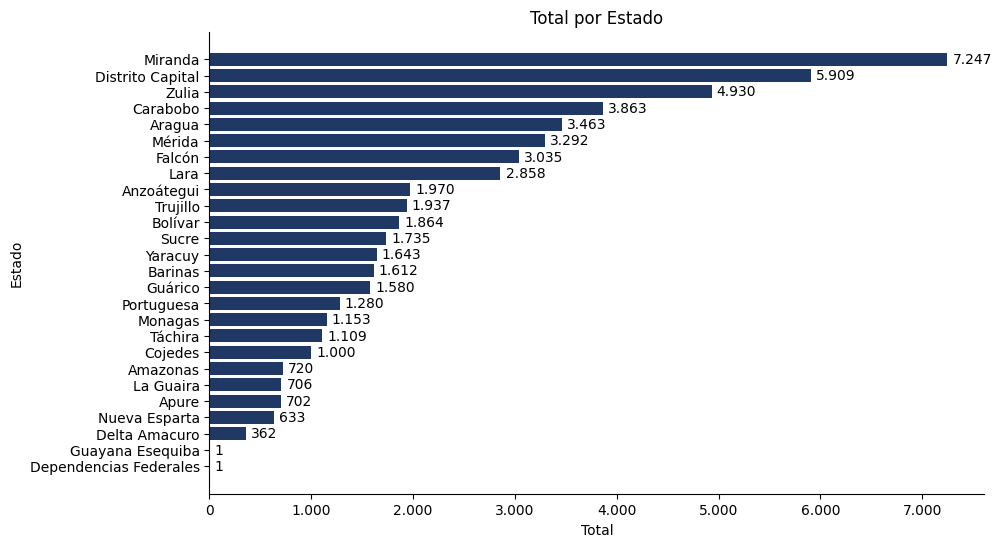

In [ ]:
# Try setting the locale to 'es_ES' if 'es_ES.UTF-8' is not supported
try:
    locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_ALL, 'es_ES')
        print("Using 'es_ES' locale instead of 'es_ES.UTF-8'")
    except locale.Error:
        locale.setlocale(locale.LC_ALL, '')  # Revert to default locale
        print(" ")

# Suponiendo que 'estados' es un DataFrame con columnas 'Estado' y 'Total'
estados = estados.sort_values('Total', ascending=True)  # Ordenar los datos en orden ascendente

# Crear el área del gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
bars = plt.barh(estados['Estado'], estados['Total'], color='#203864')

# Formatear el eje horizontal para mostrar separadores de miles
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: cambiar_separadores(locale.format_string("%d", int(x), grouping=True))))

# Mostrar etiquetas de datos
padding = 50  # Parámetro para ajustar la distancia de las etiquetas: Ajusta este valor según lo necesites
for bar in bars:
    plt.text(bar.get_width() +  padding,
             bar.get_y() + bar.get_height() / 2,
             cambiar_separadores(locale.format_string("%d", int(bar.get_width()), grouping=True)),
             va='center', ha='left',
             color='black', fontsize=10)

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Mostrar los nombres de los ejes y del gráfico
plt.xlabel('Total')
plt.ylabel('Estado')
plt.title('Total por Estado')

# Mostrar el gráfico
plt.show()

Análisis del gráfico anterior

## 1.3. Análisis de diferencia entre el Reporte Completo y la Página OEL

In [ ]:
type(conteo_valores1)

pandas.core.series.Series

In [ ]:
conteo_valores1

,count
Estado,
Guayana esequiba,1
Dependencias federales,2
Delta amacuro,385
Nueva esparta,699
La guaira,793
Apure,819
Amazonas,956
Cojedes,1027
Monagas,1374


In [ ]:
#convertir la serie 'conteo_valores1' en un dataframe para poder compararlo con otro dataframe
cont=pd.DataFrame(conteo_valores1)

#cambio de nombre de la columna originamente llamada 'count' por 'Total'
cont.rename(columns={'count': 'Total'}, inplace=True)


In [ ]:
type(cont)

pandas.core.frame.DataFrame

In [ ]:
cont

,Total
Estado,
Guayana esequiba,1
Dependencias federales,2
Delta amacuro,385
Nueva esparta,699
La guaira,793
Apure,819
Amazonas,956
Cojedes,1027
Monagas,1374


In [ ]:
#creando una copia del dataframe 'estados' para poder hacer modificaciones sin afectar el dataframe original
estados1=estados.copy()

# Colocando de índice a la columna 'Estado'
estados1.set_index('Estado', inplace=True)

# Cambiar las letras de la columna 'Estado' a mayúsculas
estados1.index = estados1.index.str.upper()


In [ ]:
type(estados1)

pandas.core.frame.DataFrame

In [ ]:
# Comparar los índices y calcular las diferencias en valores de columnas determinadas

# Especificar las columnas a comparar. La lista resultante puede contener uno o varios elementos
columns_to_compare = ['Total']

# Obtener los resultados de la comparación
comparison_result = compare_dataframes(cont, estados1, columns_to_compare)

# Ordenar el resultado de la comparación de forma descendente por la columna 'Total_Diff'
comparison_result = comparison_result.sort_values(by='Total_Diff', ascending=False)

# Mostrar el resultado de la comparación
print("\nResultado de la comparación:")
print(comparison_result)



Resultado de la comparación:
                        Total_Diff
Estado                            
Guayana esequiba               NaN
Dependencias federales         NaN
Delta amacuro                  NaN
Nueva esparta                  NaN
La guaira                      NaN
Apure                          NaN
Amazonas                       NaN
Cojedes                        NaN
Monagas                        NaN
Táchira                        NaN
Portuguesa                     NaN
Sucre                          NaN
Guárico                        NaN
Barinas                        NaN
Trujillo                       NaN
Yaracuy                        NaN
Bolívar                        NaN
Anzoátegui                     NaN
Lara                           NaN
Falcón                         NaN
Mérida                         NaN
Aragua                         NaN
Carabobo                       NaN
Zulia                          NaN
Distrito capital               NaN
Miranda                  

Análisis de la tabla anterior

# 2. Distribución por sexos

## 2.1. Distribución por sexos del Reporte Completo

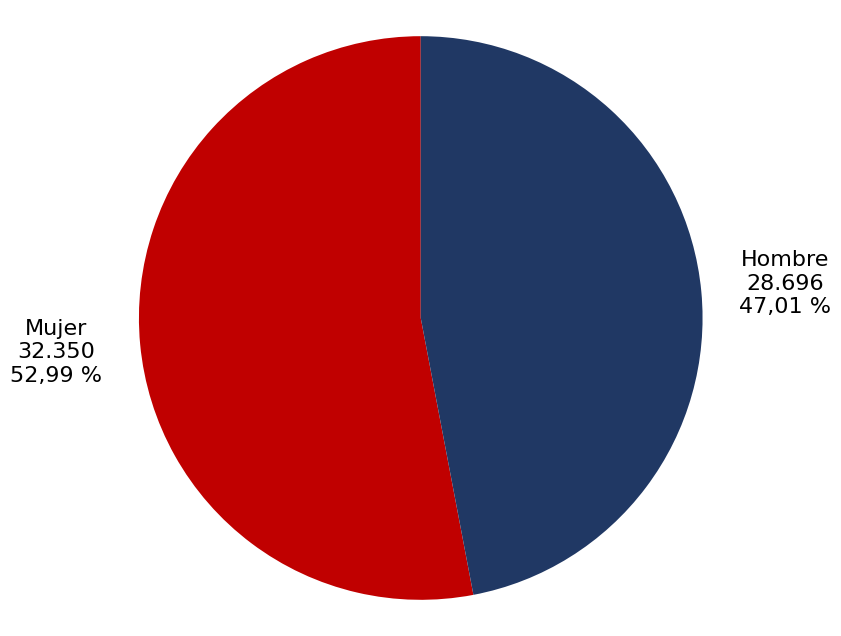

In [ ]:
# Supongamos que quieres hacer el gráfico de torta para la columna 'Sexo'
columna_a_graficar = 'Sexo'  # Reemplaza 'Nombre de la Columna' con el nombre de tu columna
colores = ['#c00000', '#203864']

# Contar la cantidad de valores repetidos
conteo_valores3 = filtered_df[columna_a_graficar].value_counts()

# Creando el gráfico de torta con etiquetas y etiquetas de datos
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(conteo_valores3.values,
                                  colors=colores,
                                  autopct='',
                                  startangle=90,
                                  textprops={'fontsize': 12})

# La relación de aspecto uniforme garantiza que el gráfico circular se dibuje como un círculo.
ax.axis('equal')

# Asignando conteo_valores3.values a sizes
sizes = conteo_valores3.values

# Añadiendo etiqueta de datos a cada porción
for i, label in enumerate(conteo_valores3.index):
    # Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # Ajustar la distancia de las etiquetas al centro
    offset = 1.3  # Ajusta este valor para cambiar la distancia

    # Crear la etiqueta con múltiples líneas y separadores de miles
    ax.text(x * offset, y * offset, f"{label}\n{colocar_separador_miles(sizes[i])}\n{cambiar_separador(round(sizes[i] / sum(sizes) * 100, 2))} %",
            ha='center', va='center', fontsize=16)

# Mostrar gráfico
plt.show()

In [ ]:
conteo_valores3

,count
Sexo,
Mujer,32350
Hombre,28696


In [ ]:
#convertir la serie 'conteo_valores3' en un dataframe para poder compararlo con otro dataframe
cont_sex=pd.DataFrame(conteo_valores3)

#cambio de nombre de la columna originamente llamada 'count' por 'Total'
cont_sex.rename(columns={'count': 'Total'}, inplace=True)

cont_sex

,Total
Sexo,
Mujer,32350
Hombre,28696


Análisis del gráfico anterior

## 2.2. Distribución por sexos de la página del OEL

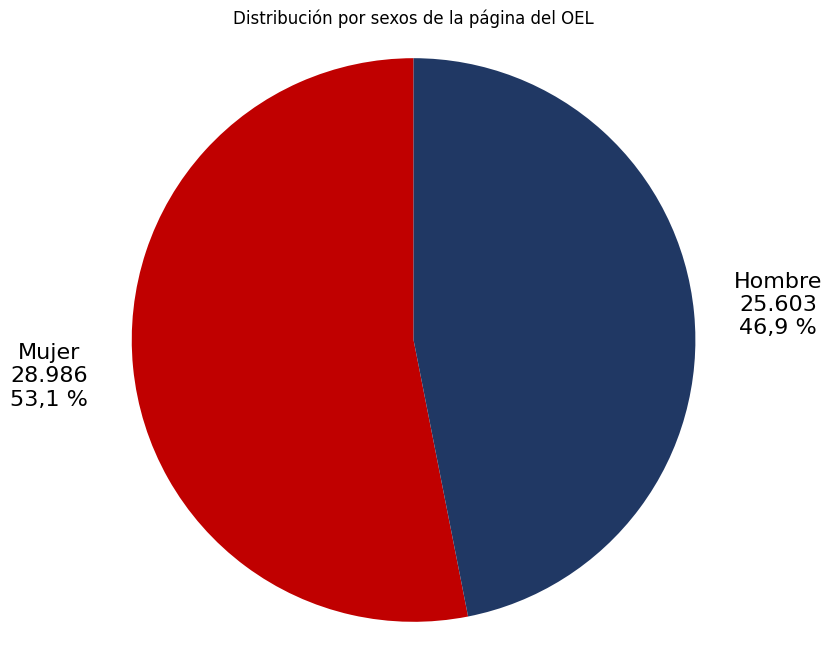

In [ ]:
# Del dataframe 'sexos' crear un gráfico de torta

# Assuming 'sexos' DataFrame exists and has columns 'Sexo' and 'Total'

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sexos['Total'], startangle=90, colors=['#c00000', '#203864'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Asignando sexos['Total'].values a size
size = sexos['Total'].values

# Use `range(len(sexos))` to match the pie chart slices.
for i in range(len(sexos)):
    # Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    # Use the correct axes object. Since you're creating a new figure, use `plt.gca()` to get the current axes.
    ax = plt.gca()
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # Ajustar la distancia de las etiquetas al centro
    offset = 1.3  # Ajusta este valor para cambiar la distancia

    # Crear la etiqueta con múltiples líneas y separadores de miles
    ax.text(x * offset, y * offset, f"{sexos['Sexo'][i]}\n{colocar_separador_miles(size[i])}\n{cambiar_separador(round(size[i] / sum(size) * 100, 2))} %",
            ha='center', va='center', fontsize=16)


plt.title('Distribución por sexos de la página del OEL')
plt.show()

In [ ]:
sexos

,Sexo,Total
0,Mujer,28986
1,Hombre,25603


In [ ]:
#creando una copia del dataframe 'sexos' para poder hacer modificaciones sin afectar el dataframe original
sexos1=sexos.copy()

# Colocando de índice a la columna 'Estado'
sexos1.set_index('Sexo', inplace=True)

"""
# Cambiar las letras de la columna 'Estado' a mayúsculas
estados1.index = estados1.index.str.upper()
"""
sexos1

,Total
Sexo,
Mujer,28986
Hombre,25603


In [ ]:
cont_sex

,Total
Sexo,
Mujer,32350
Hombre,28696


## 2.3. Análisis de diferencia entre el Reporte Completo y la Página OEL

In [ ]:

# Comparar los índices y calcular las diferencias en valores de columnas determinadas

# Especificar las columnas a comparar. La lista resultante puede contener uno o varios elementos
column_to_compare = ['Total']

# Obtener los resultados de la comparación
comparison_result2 = compare_dataframes(cont_sex, sexos1, column_to_compare)

# Mostrar el resultado de la comparación
print("\nResultado de la comparación de los datos de la Página OEL respecto al Reporte Completo:")
comparison_result2


Resultado de la comparación de los datos de la Página OEL respecto al Reporte Completo:


,Total_Diff
Sexo,
Mujer,-3364
Hombre,-3093


Análisis de la tabla Anterior

# 3. Distribución por grupo etario (Aplicar un ANOVA)

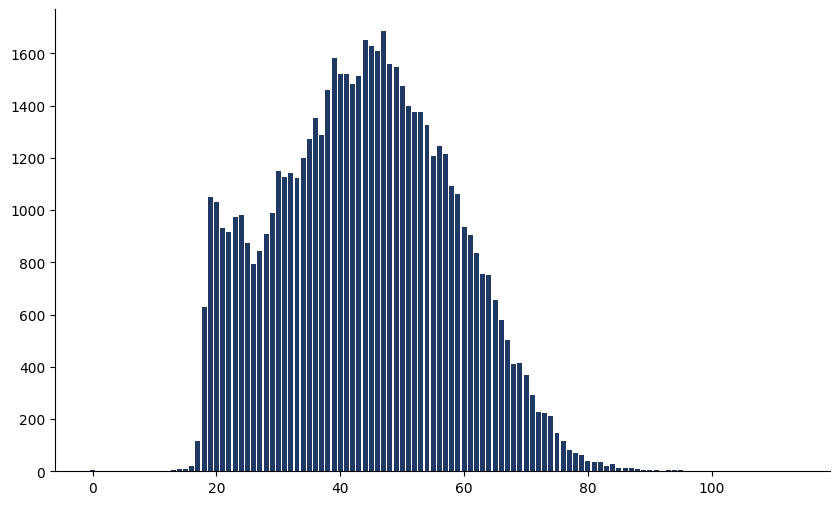

In [ ]:
# 1. Hacer el gráfico de barras horizontales para la columna 'Edad.'
column = 'Edad'

# 2. Contar la cantidad de valores repetidos y ordenarlos de forma descendente
conteo_valores4 = filtered_df[column].value_counts().sort_index()

# 3. Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
bars = plt.bar(conteo_valores4.index, conteo_valores4.values, color='#203864')

# 4. Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
  plt.gca().spines[spine].set_visible(False)


# Mostrar el gráfico
plt.show()

In [ ]:
conteo_valores4

,count
Edad,
0,4
2,1
11,2
12,1
13,3
...,...
96,1
97,1
99,1


In [ ]:
# Mostrar estadísticas descriptivas de la columna 'Edad' dentro del dataframe 'df'
print("\nEstadísticas descriptivas:")
print(filtered_df['Edad'].describe())


Estadísticas descriptivas:
count    61046.000000
mean        43.826672
std         14.120911
min          0.000000
25%         33.000000
50%         44.000000
75%         54.000000
max        113.000000
Name: Edad, dtype: float64


In [ ]:
filtered_df['Edad']

,Edad
0,41
1,48
2,59
3,54
4,22
...,...
62286,47
62287,42
62288,32
62289,47


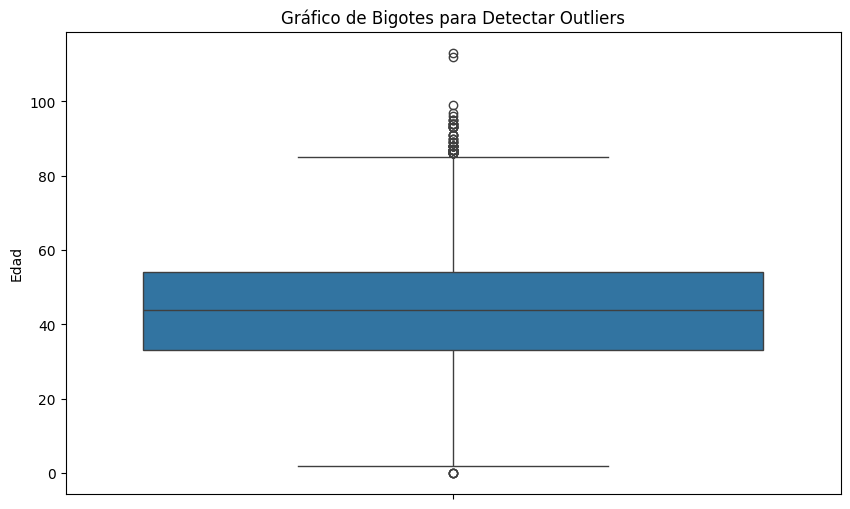

In [ ]:

# Crear un gráfico de bigotes (boxplot)
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_filtrado, y='Edad')

# Configurar etiquetas y título
plt.ylabel('Edad')
plt.title('Gráfico de Bigotes para Detectar Outliers')

# Mostrar el gráfico
plt.show()


In [ ]:
# prompt: escribe un código que me permita generar una lista con los outliers de la columna 'Edad' del dataframe df_filtrado

# Assuming df_filtrado is your DataFrame and 'Edad' is the column with outliers

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

outliers_edad = find_outliers_iqr(filtered_df['Edad'])
print(f"Outliers in 'Edad' column: {outliers_edad}")

Outliers in 'Edad' column: [97, 87, 86, 0, 0, 88, 87, 0, 113, 86, 89, 87, 86, 89, 88, 112, 90, 87, 87, 0, 99, 93, 91, 93, 95, 88, 88, 93, 86, 93, 93, 86, 88, 91, 93, 87, 88, 86, 94, 95, 87, 86, 96, 91, 90, 91, 95, 87, 88, 87, 86, 88, 86, 87, 88, 87, 86, 90, 94, 89, 94, 86, 89, 94, 87, 94]


In [ ]:
# prompt: escribe un código a fin de que se cree un dataframe a partir de df_filtrado, que deje solo los valores contenidos en outliers_edad

# Crear un nuevo DataFrame que contenga solo las filas donde la columna 'Edad' está en outliers_edad
df_outliers = filtered_df[filtered_df['Edad'].isin(outliers_edad)]



# Exportar el DataFrame df_copy a un archivo Excel
df_outliers.to_excel('df_outliers.xlsx', index=False)

# Mostrar un mensaje de éxito
print('El DataFrame ha sido exportado exitosamente a df_outliers.xlsx')

# Mostrar el nuevo DataFrame
df_outliers

El DataFrame ha sido exportado exitosamente a df_outliers.xlsx


,Nro,Nacionalidad,Cedula de identidad,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Sexo,Estado Civil,...,Organismo financiero,Tipo de financiamiento,Monto otorgado,Posee patente,Modalidad,Sub-modalidad,Número de registro,Modalidad2,Sub-modalidad3,Número de registro4
3872,3873,V,3098057,CASTOR,JOSE,ZARRAGA,CHACON,97,Hombre,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4622,4623,V,3719797,IPPOLITI,GRAMACCIA,WUILIAN,JOSE,87,Hombre,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4650,4651,V,2111856,Lila,NaN,Miranda,De Mirabal,86,Mujer,Casado/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
5328,5329,V,32980924,Maryuri,Lisseth,Ayala,Guerrero,0,Mujer,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
7085,7086,V,32304739,Yorgelis,Carolina,Landaeta,Morin,0,Mujer,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46138,46139,V,1418792,JOFFRE,ARMANDO,NUÑEZ,COVA,86,Hombre,Casado/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
46151,46152,V,1027653,TEOLINDA,MARIA,BOLIVAR,BARRETO,89,Mujer,Divorciado/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
46359,46360,V,159689,RICARDO,NaN,MATOS,NaN,94,Hombre,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
46959,46960,V,6078146,AJOY,KUMAR,BANERJEE,NaN,87,Hombre,Soltero/a,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1.1. Distribución de los registros por grupo etario del Reporte Completo

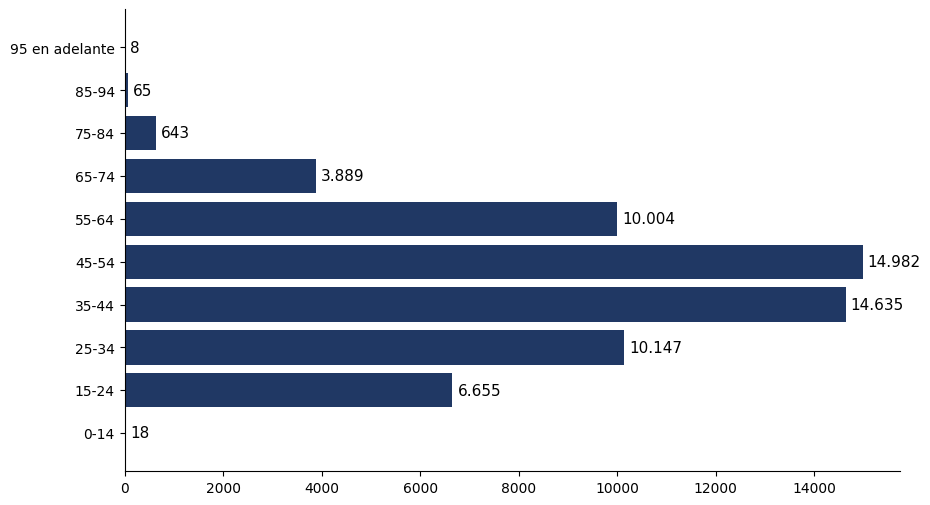

In [ ]:
# Aplicar la función a la columna de edades para crear una nueva columna de rangos de edad
filtered_df['Rango de Edad'] = filtered_df['Edad'].apply(agrupar_edades)

# Contar la cantidad de valores repetidos y ordenarlos de forma descendente
conteo_valores5 = filtered_df['Rango de Edad'].value_counts().sort_index()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
bars = plt.barh(conteo_valores5.index, conteo_valores5.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Añadir etiquetas de datos a cada barra

# Parámetro para ajustar la distancia de las etiquetas
padding = 100 # Ajusta este valor según lo necesites
for bar in bars:
    width = bar.get_width()
    plt.text(width + padding, bar.get_y() + bar.get_height()/2,
             f'{colocar_separador_miles(width)}',
             ha='left', va='center', fontsize=11)

# Mostrar el gráfico
plt.show()

In [ ]:
"""Escribe un código en Python que realice lo siguiente, paso a paso:

1. Filtre un DataFrame (filtered_df) para conservar solo las filas donde la columna 'Edad' cumpla una de estas condiciones:
  Valores entre 0 y 14 (inclusive).
  Valores mayores o iguales a 85.
(Usa el método between() y el operador | para combinar condiciones).

2. Exporte el DataFrame resultante a un archivo Excel llamado 'filtered_df_edad.xlsx' (sin incluir el índice).
3. Muestre un mensaje de confirmación en la consola (ej: "El DataFrame ha sido exportado exitosamente a filtered_df_edad.xlsx").
4. Finalmente, muestre el DataFrame filtrado en la salida.

Incluye comentarios breves en cada paso para explicar la lógica."""

filtered_df_edad = filtered_df[filtered_df['Edad'].between(0, 14) | (filtered_df['Edad'] >= 95)]

# Exportar el DataFrame df_copy a un archivo Excel
filtered_df_edad.to_excel('filtered_df_edad.xlsx', index=False)

# Mostrar un mensaje de éxito
print('El DataFrame ha sido exportado exitosamente a filtered_df_edad.xlsx')

# Mostrar el nuevo DataFrame
filtered_df_edad

El DataFrame ha sido exportado exitosamente a filtered_df_edad.xlsx


,Nro,Nacionalidad,Cedula de identidad,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Sexo,Estado Civil,...,Monto otorgado,Posee patente,Modalidad,Sub-modalidad,Número de registro,Modalidad2,Sub-modalidad3,Número de registro4,Rango de Edad,Año de Registro
1004,1005,V,34614984,emanuel,david,de la cruz,uriana,12,Hombre,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,0-14,2025
1109,1110,V,33480245,HANYA,ALEJANDRA,GARCIA,SOTO,14,Mujer,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,0-14,2024
3872,3873,V,3098057,CASTOR,JOSE,ZARRAGA,CHACON,97,Hombre,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,95 en adelante,2021
5328,5329,V,32980924,Maryuri,Lisseth,Ayala,Guerrero,0,Mujer,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,0-14,2024
6477,6478,V,27886035,Jeferson,Jose,Pernalete,Barrios,14,Hombre,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,0-14,2024
7085,7086,V,32304739,Yorgelis,Carolina,Landaeta,Morin,0,Mujer,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,0-14,2024
10649,10650,V,28582375,Daniela,De jesus,Gonzalez,bravo,0,Mujer,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,0-14,2024
11338,11339,V,1073884,Heliodoro,Ramon,Chacin,Gonzalez,113,Hombre,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,95 en adelante,2024
12786,12787,V,37,Lino,Guillermo,Esteva,Rios,112,Hombre,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,95 en adelante,2024
15350,15351,V,33887090,VÍCTOR,PAÚL,PARRA,PARRA,14,Hombre,Soltero/a,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,0-14,2024


### 3.1.2. Distribución de los registros por grupo etario y sexo del Reporte Completo

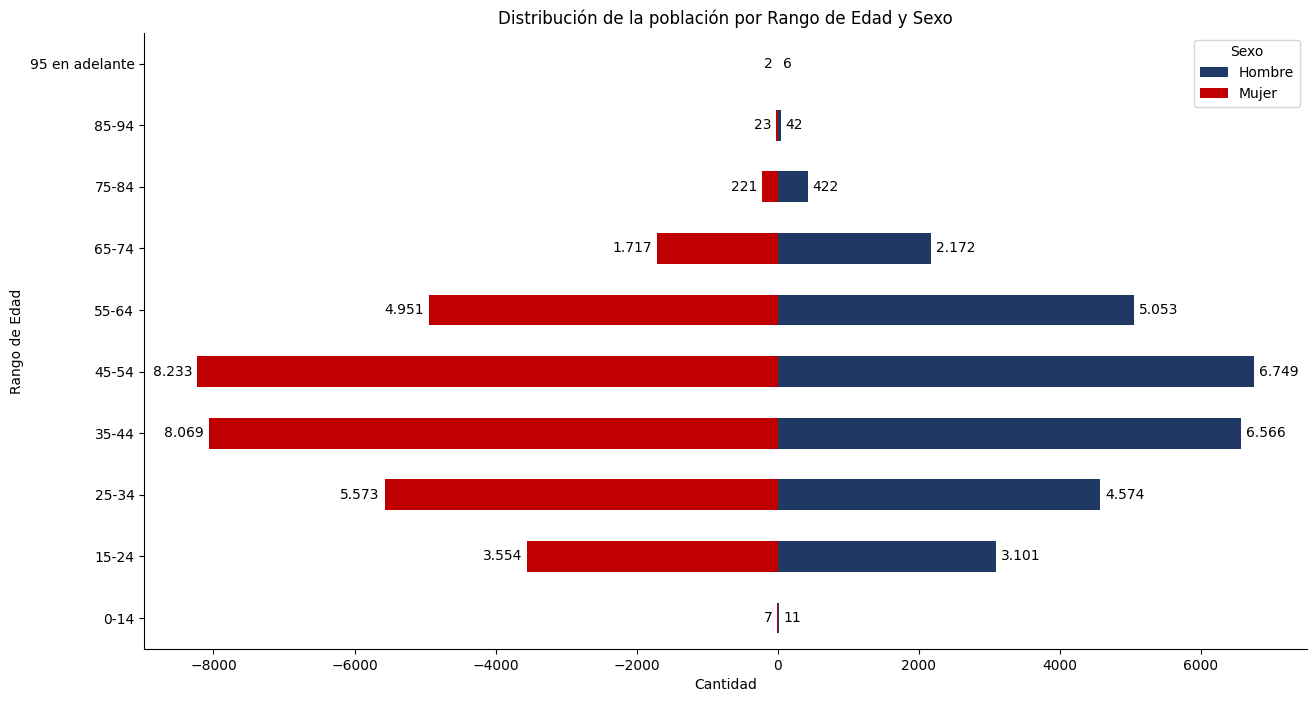

In [ ]:
# Aplicar la función a la columna de edades para crear una nueva columna de rangos de edad
filtered_df['Rango de Edad'] = filtered_df['Edad'].apply(agrupar_edades)

# Agrupar por rango de edad y sexo
conteo_valores6 = filtered_df.groupby(['Rango de Edad', 'Sexo']).size().unstack(fill_value=0)

# Convertir los valores negativos para la gráfica invertida
conteo_valores6['Mujer'] = conteo_valores6['Mujer'] * -1

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(15, 8))

# Graficar los valores
conteo_valores6.plot(kind='barh', stacked=True, ax=ax, color=['#203864', '#c00000'])

# Añadir etiquetas de datos a cada barra
# Get the y-tick positions
y_ticks = ax.get_yticks()
padding = 70  # Ajusta este valor según lo necesites
for i, label in enumerate(conteo_valores6.index):
    ax.text(conteo_valores6.at[label, 'Mujer'] - padding, y_ticks[i], f'{colocar_separador_miles(abs(conteo_valores6.at[label, "Mujer"]))}', ha='right', va='center', color='black')
    ax.text(conteo_valores6.at[label, 'Hombre'] + padding, y_ticks[i], f'{colocar_separador_miles(conteo_valores6.at[label, "Hombre"])}', ha='left', va='center', color='black')


# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.xlabel('Cantidad')
plt.ylabel('Rango de Edad')
plt.title('Distribución de la población por Rango de Edad y Sexo')
plt.legend(title='Sexo')
plt.show()

Análisis del gráfico anterior

### 3.2.1. Distribución de los registros por grupo etario de la página del OEL

In [ ]:
edad

,Edad,Mujer,Hombre,Total
0,75+,197,394,591
1,65-74,1434,1851,3285
2,55-64,4330,4522,8852
3,45-54,7259,5998,13257
4,35-44,7280,5848,13128
5,25-34,5081,4100,9181
6,15-24,3397,2879,6276
7,0-14,8,11,19


### 3.2.2. Distribución de los registros por grupo etario y sexo de la página del OEL

## 3.3. Análisis de diferencia entre el Reporte Completo y la Página OEL

# 4. Talento humano dedicado I+D

##4.1. Talento Humano dedicado a actividades I+D en el Reporte completo

##4.2. Talento Humano dedicado a actividades I+D indicado en la página del OEL

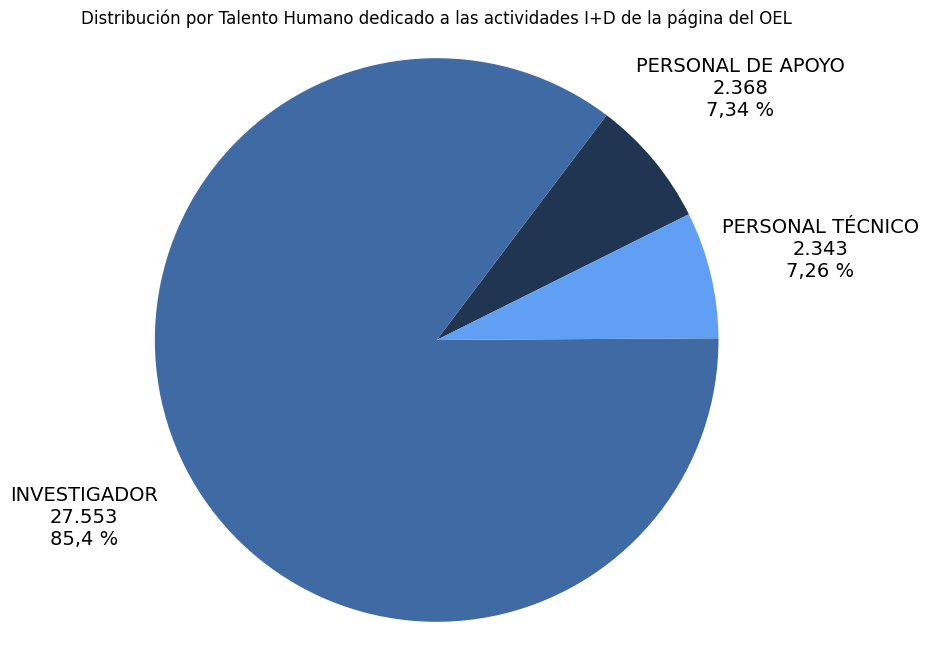

In [ ]:
# prompt: crea un gráfico de torta del dataframe 'talento_humano'

# Assuming 'talento_humano' DataFrame exists and has columns 'Nombre' and 'Total'

# Create the pie chart
plt.figure(figsize=(8, 8))
b_color = [96, 159, 244]
color=generate_gradient_colors(b_color, len(talento_humano['Total']))
plt.pie(talento_humano['Total'], startangle=26.5, colors=color)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Asignando talento_humano['Total'].values a size
siz = talento_humano['Total'].values

# Use `range(len(talento_humano))` to match the pie chart slices.
for i in range(len(talento_humano)):
    # Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    # Use the correct axes object. Since you're creating a new figure, use `plt.gca()` to get the current axes.
    ax = plt.gca()
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # Ajustar la distancia de las etiquetas al centro
    offset = 1.4  # Ajusta este valor para cambiar la distancia

    # Crear la etiqueta con múltiples líneas y separadores de miles
    ax.text(x * offset, y * offset, f"{talento_humano['Nombre'][i]}\n{colocar_separador_miles(siz[i])}\n{cambiar_separador(round(siz[i] / sum(siz) * 100, 2))} %",
            ha='center', va='center', fontsize=14)


plt.title('Distribución por Talento Humano dedicado a las actividades I+D de la página del OEL')
plt.show()


Análisis del gráfico anterior

## 4.3. Análisis de diferencia entre el Reporte Completo y la Página OEL

# 5. Sector donde labora el personal en I+D

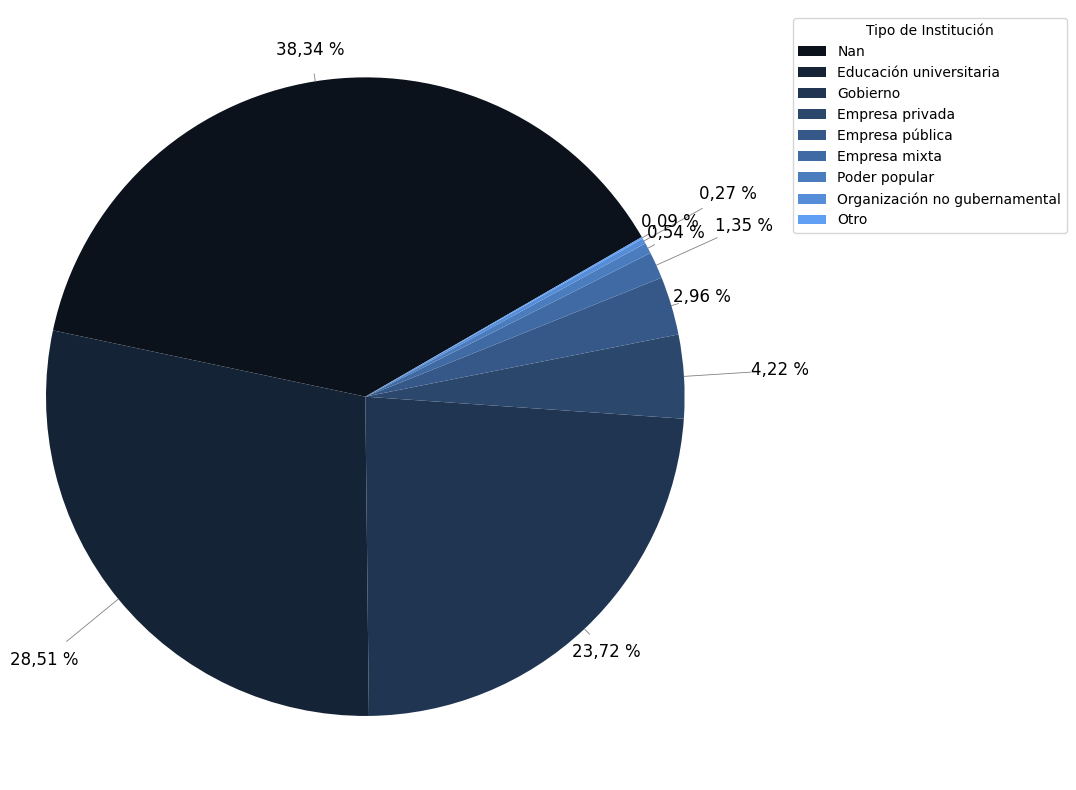

In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'Tipo Institucion' es la columna a graficar
columna_a_graficar = 'Tipo Institucion'  # Reemplaza 'Tipo Institucion' con el nombre de tu columna

bas_color = [96, 159, 244]
tipo_institucion = filtered_df[columna_a_graficar].unique()
colores = generate_gradient_colors(bas_color, len(tipo_institucion))  # Usando una paleta de colores degradada

# Contar la cantidad de valores repetidos
conteo_valores7 = filtered_df[columna_a_graficar].value_counts()

# Crear el gráfico de torta con etiquetas de datos en el exterior
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(conteo_valores7.values,
                                  colors=colores,
                                  autopct='',
                                  startangle=30,
                                  textprops={'fontsize': 12})

# Asignando conteo_valores.values a sizes
sizes = conteo_valores7.values

# Añadiendo etiqueta de datos a cada porción
for i, label in enumerate(conteo_valores7.index):
    # Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # Ajustar la distancia de las etiquetas al centro
    offset = 1.1 if i % 2 == 0 else 1.3 # Intercalar el offset para índices pares e impares
    #offset = 1.1  # Ajusta este valor para cambiar la distancia

    # Crear la etiqueta con múltiples líneas y separadores de miles
    ax.text(x * offset, y * offset, f"{cambiar_separador(round(sizes[i] / sum(sizes) * 100, 2))} %",
            ha='center', va='center', fontsize=12)

    # Dibujar línea guía
    ax.plot([x, x * 0.93 * offset], [y, y * 0.93 * offset], color='gray', linestyle='-', linewidth=0.6)


# La relación de aspecto uniforme garantiza que el gráfico circular se dibuje como un círculo.
ax.axis('equal')

# Crear la leyenda fuera del gráfico
plt.legend(wedges, conteo_valores7.index,
           title="Tipo de Institución",
           loc="center left",
           bbox_to_anchor=(1, 0.35, 0.5, 1))

# Mostrar gráfico
#plt.title('Distribución por Tipo de Institución')  # Agregar un título
plt.show()


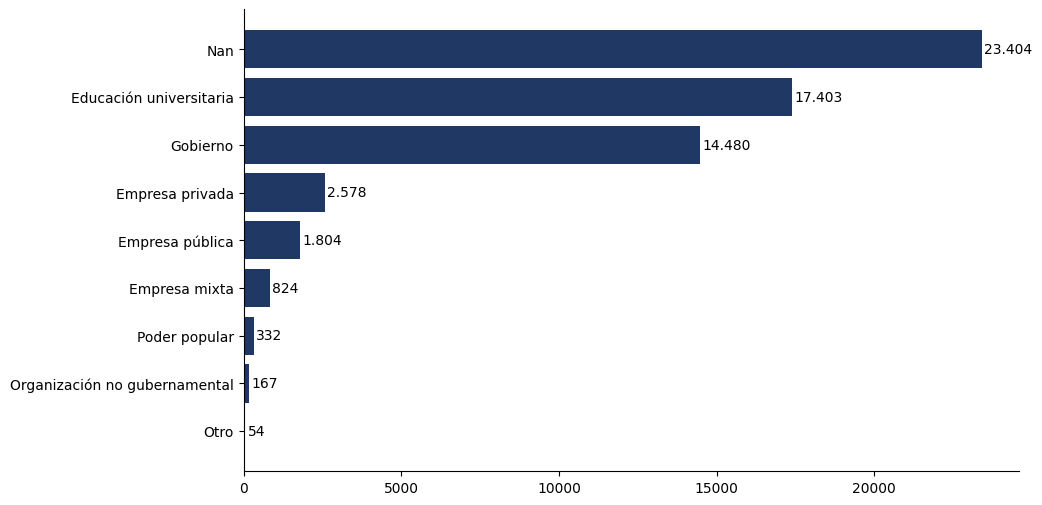

In [ ]:
# prompt: crea un gráfico de barras horizontales con la columna 'Tipo Institución', donde se muestren las barras en orden descendente y con las etiquetas de datos al lado de cada barra

# Suponiendo que 'df' es tu DataFrame y 'Tipo Institucion' es la columna a graficar
columna_a_graficar = 'Tipo Institucion'

# Contar la cantidad de valores repetidos y ordenarlos de forma descendente
conteo_valores8 = filtered_df[columna_a_graficar].value_counts().sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(conteo_valores8.index, conteo_valores8.values, color='#203864')

# Agregar etiquetas de datos al lado de cada barra
for i, v in enumerate(conteo_valores8.values):
    plt.text(v + 70, i, f'{colocar_separador_miles(v)}', color='black', va='center')  # Ajusta 0.5 para el espaciado

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Mostrar el gráfico
plt.show()

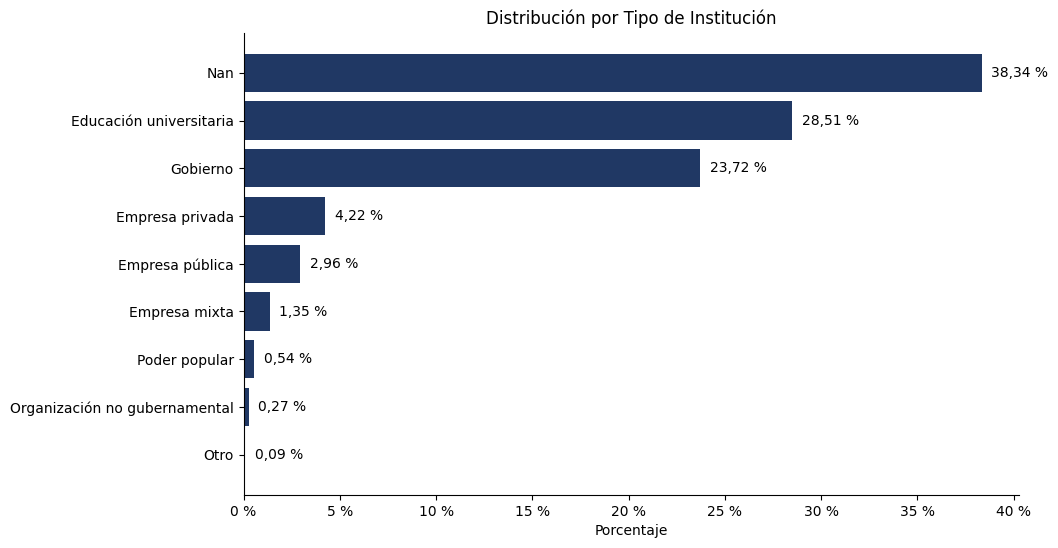

In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'Tipo Institucion' es la columna a graficar
columna_a_graficar = 'Tipo Institucion'

# Contar la cantidad de valores repetidos y ordenarlos de forma descendente
conteo_valores9 = filtered_df[columna_a_graficar].value_counts().sort_values(ascending=True)
total_valores = conteo_valores9.sum()  # Obtener el total de valores

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(conteo_valores9.index, conteo_valores9.values / total_valores * 100, color='#203864')

# Agregar etiquetas de datos al lado de cada barra
for i, v in enumerate(conteo_valores9.values):
    porcentaje = v / total_valores * 100
    plt.text(porcentaje + 0.5, i, f'{porcentaje:.2f} %'.replace('.', ','), color='black', va='center')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Formatear el eje horizontal para mostrar porcentaje
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(formatear_porcentaje))

# Mostrar el gráfico
plt.title('Distribución por Tipo de Institución')
plt.xlabel('Porcentaje')
plt.show()


Análisis del gráfico anterior

# 6. Distribución por estudios o nivel académico (Se puede ajustar a dos tortas como está en el notebook de Boletín-indicadores)

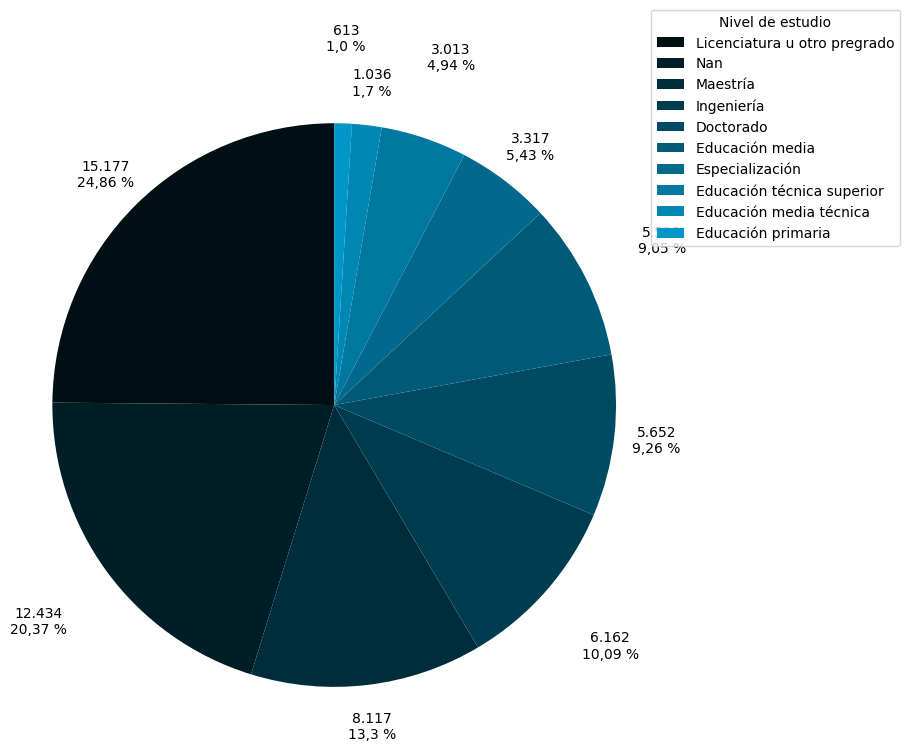

In [ ]:
# Hacer el gráfico de torta para la columna 'Nivel de Estudio'
col = 'Nivel de Estudio'  # Reemplaza 'Nombre de la Columna' con el nombre de tu columna
nivel_estudios = filtered_df[col].unique()

# Generar colores degradados
base_color = [0, 150, 200]
colores = generate_gradient_colors(base_color, len(nivel_estudios))

# 1. Contar la cantidad de valores repetidos
conteo_valores10 = filtered_df[col].value_counts()

# 2. Creando el gráfico de torta con etiquetas y etiquetas de datos
fig, ax = plt.subplots(figsize=(8, 8))

# Eliminar el fondo blanco del gráfico
fig.patch.set_visible(False)
ax.patch.set_visible(False)

wedges, texts, autotexts = ax.pie(conteo_valores10.values,
                                  colors=colores,
                                  autopct='',
                                  startangle=90,
                                  textprops={'fontsize': 11})

# 3. La relación de aspecto uniforme garantiza que el gráfico circular se dibuje como un círculo.
ax.axis('equal')

# plt.title(f'Distribución de valores en la columna {columna_a_graficar}')

# 4. Asignando conteo_valores.values10 a sizes
sizes = conteo_valores10.values

# 5. Añadiendo etiqueta de datos a cada porción
for i, label in enumerate(conteo_valores10.index):
    # 5.1 Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # 5.2 Ajustar la distancia de las etiquetas al centro
    offset = 1.15 if i % 2 == 0 else 1.3 # Intercalar el offset para índices pares e impares
    #offset = 1.15  # Ajusta este valor para cambiar la distancia

    # 5.3 Crear la etiqueta con múltiples líneas
#    ax.text(x * offset, y * offset, f"{label}\n{colocar_separador_miles(sizes[i])}\n{cambiar_separador(round(sizes[i]/sum(sizes)*100, 2))} %", ha='center', va='center', fontsize = 10)
    ax.text(x * offset, y * offset, f"{colocar_separador_miles(sizes[i])}\n{cambiar_separador(round(sizes[i]/sum(sizes)*100, 2))} %", ha='center', va='center', fontsize = 10)

# 6. Mostrar gráfico

# Crear la leyenda fuera del gráfico
plt.legend(wedges, conteo_valores10.index,
           title="Nivel de estudio",
           loc="center left",
           bbox_to_anchor=(1, 0.45, 0.5, 1))



plt.show()

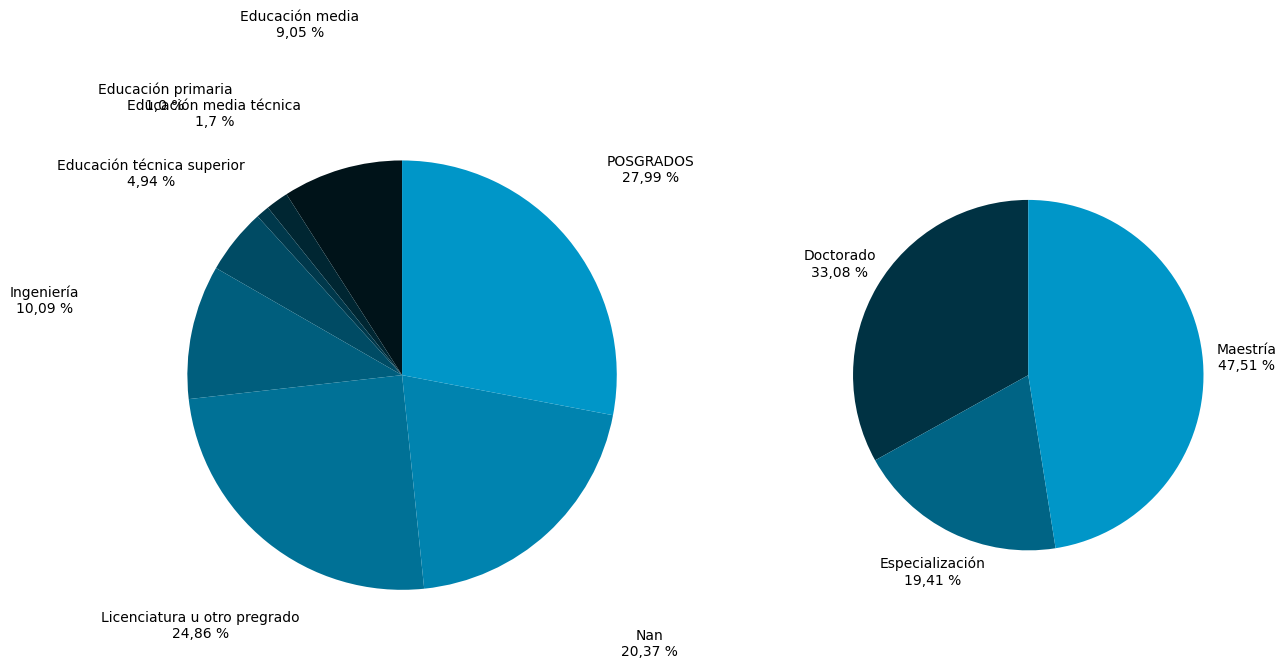

In [ ]:
"""
prompt: Generar un código Python que, dado el DataFrame con la columna 'Nivel de Estudio', realice lo siguiente:
1. Agrupe los datos por grado académico y cuente la cantidad de personas en cada grupo.
2. Cree una nueva categoría llamada 'Posgrados' que agrupe los grados de 'Doctorado', 'Maestría' y 'Especialista'.
3. Genere dos gráficos de torta:
 	Uno que muestre la distribución general de todos los grados académicos, incluyendo 'Posgrados'.
 	Otro que detalle la distribución de los diferentes tipos de posgrados.
 4. Calcular y mostrar el porcentaje de personas en cada categoría en ambos gráficos.
5. Personalizar los gráficos con títulos claros y un diseño atractivo.
6. Utilizar una paleta de colores degradados a partir de un color base para los gráficos.
7. Agregar una leyenda a cada gráfico.
8. Optimiza el código a fin de que se coloquen etiquetas de datos en múltiples líneas y en las porciones se coloquen colores degradados a partir de un color base
"""
# 1. Agrupar por grado académico y contar
grado_academico_counts = filtered_df.groupby('Nivel de Estudio')['Nivel de Estudio'].count()

# 2. Crear categoría 'Posgrados'
posgrados = ['Doctorado', 'Maestría', 'Especialización'] # Asegúrate de que los nombres coincidan con los del DataFrame
suma_posgrados = grado_academico_counts[grado_academico_counts.index.isin(posgrados)].sum()
grado_academico_counts_modified = grado_academico_counts.drop(posgrados)
grado_academico_counts_modified['POSGRADOS'] = suma_posgrados

# 3. Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [2, 1]})


# 4. Gráfico de torta principal
color = generate_gradient_colors(base_color, len(grado_academico_counts_modified)) # genera colores degradados para el gráfico de torta principal
total_personas = grado_academico_counts_modified.sum()  # Obtener el total de personas
wedges1, texts1, autotexts1 = ax1.pie(grado_academico_counts_modified,
                                     autopct='',
                                     startangle=90, colors=color)
ax1.axis('equal')

# 4. Asignando grado_academico_counts_modified a sizes
sizes = grado_academico_counts_modified.values # to get values of the Series

# 5. Añadiendo etiqueta de datos a cada porción
for i, label in enumerate(grado_academico_counts_modified.index): # Changed total_personas to grado_academico_counts_modified
    # 5.1 Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    angle = np.deg2rad((ax1.patches[i].theta1 + ax1.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # 5.2 Ajustar la distancia de las etiquetas al centro
    offset1 = 1.7 if i % 2 == 0 else 1.5 # Intercalar el offset para índices pares e impares
    #offset1 = 1.35  # Ajusta este valor para cambiar la distancia

    # 5.3 Crear la etiqueta con múltiples líneas
    ax1.text(x * offset1, y * offset1, f"{label}\n{cambiar_separador(round(sizes[i]/sum(sizes)*100, 2))} %", ha='center', va='center', fontsize = 10)

# 6. Asignando posgrados_counts.values a sizes2


# 7. Subgráfico para los posgrados

posgrados_counts = grado_academico_counts[grado_academico_counts.index.isin(posgrados)]
colorp = generate_gradient_colors(base_color, len(posgrados_counts)) # genera colores degradados para el subgráfico de torta
sizes2 = posgrados_counts.values # to get values of the Series
total_posgrados = posgrados_counts.sum()  # Obtener el total de posgrados
wedges2, texts2, autotexts2 = ax2.pie(posgrados_counts,
                                     autopct='',
                                     startangle=90, colors=colorp)
ax2.axis('equal')

# 8. Añadiendo etiqueta de datos a cada porción del subgráfico de torta
for i, label in enumerate(posgrados_counts.index): # Changed total_personas to posgrados_counts
    # 5.1 Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    angle = np.deg2rad((ax2.patches[i].theta1 + ax2.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # 5.2 Ajustar la distancia de las etiquetas al centro
    offset2 = 1.25  # Ajusta este valor para cambiar la distancia

    # 5.3 Crear la etiqueta con múltiples líneas
    ax2.text(x * offset2, y * offset2, f"{label}\n{cambiar_separador(round(sizes2[i]/sum(sizes2)*100, 2))} %", ha='center', va='center', fontsize = 10)


# Mostrar el gráfico
plt.tight_layout()
plt.show()

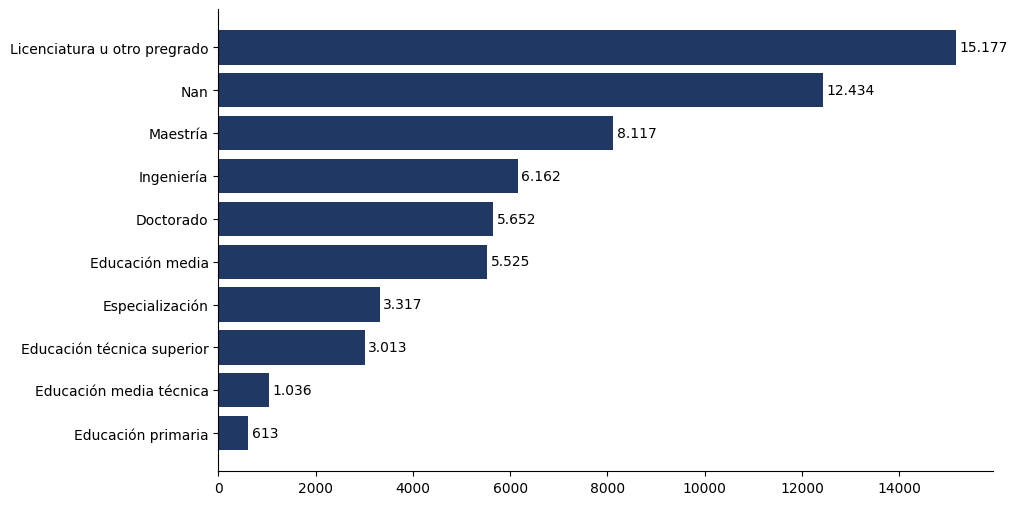

In [ ]:
# prompt: crea un gráfico de barras horizontales para la columna 'Nivel de Estudio' del dataframe

# Contar la cantidad de valores repetidos en la columna 'Nivel de Estudio'
conteo_nivel_estudio = filtered_df['Nivel de Estudio'].value_counts().sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(conteo_nivel_estudio.index, conteo_nivel_estudio.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Agregar etiquetas de datos a cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + padding, bar.get_y() + bar.get_height()/2, f'{colocar_separador_miles(int(width))}', ha='left', va='center')

# Mostrar el gráfico
plt.show()

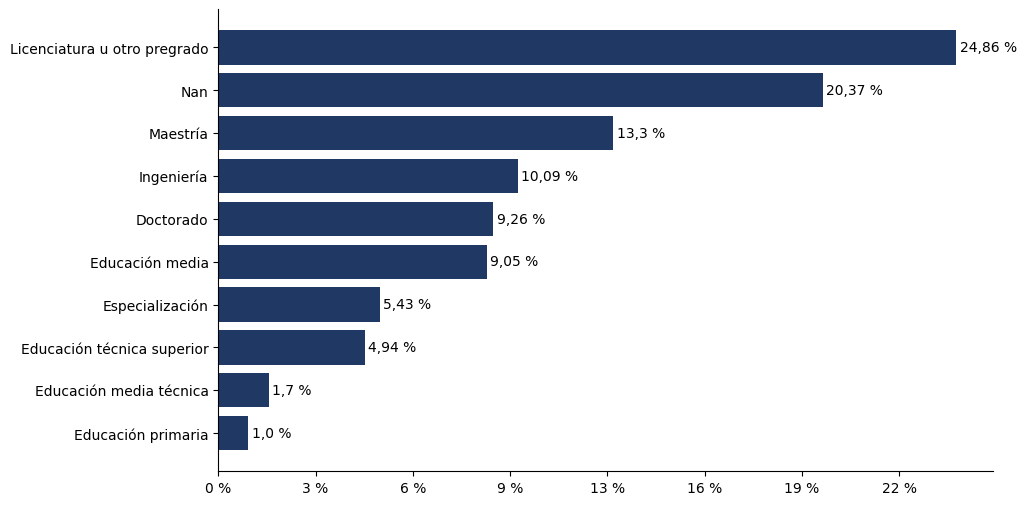

In [ ]:
# prompt: crea un gráfico de barras horizontales para la columna 'Nivel de Estudio' del dataframe

# Contar la cantidad de valores repetidos en la columna 'Nivel de Estudio'
conteo_nivel_estudio = filtered_df['Nivel de Estudio'].value_counts().sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(conteo_nivel_estudio.index, conteo_nivel_estudio.values, color='#203864')

#     Calcular el total para convertir a porcentaje
total = conteo_nivel_estudio.sum()

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int((x/total)*100)} %'))


# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Agregar etiquetas de datos a cada barra

# Get the total width for percentage calculation
total_width = sum(bar.get_width() for bar in bars)

for bar in bars:
    width = bar.get_width()
    # Calculate percentage using total width
    percentage = round(width / total_width * 100, 2)
    plt.text(width + padding, bar.get_y() + bar.get_height()/2,
             f'{cambiar_separador(percentage)} %',
             ha='left', va='center')


# Mostrar el gráfico
plt.show()

Análisis del gráfico anterior

# 7. Distribución por área de conocimiento

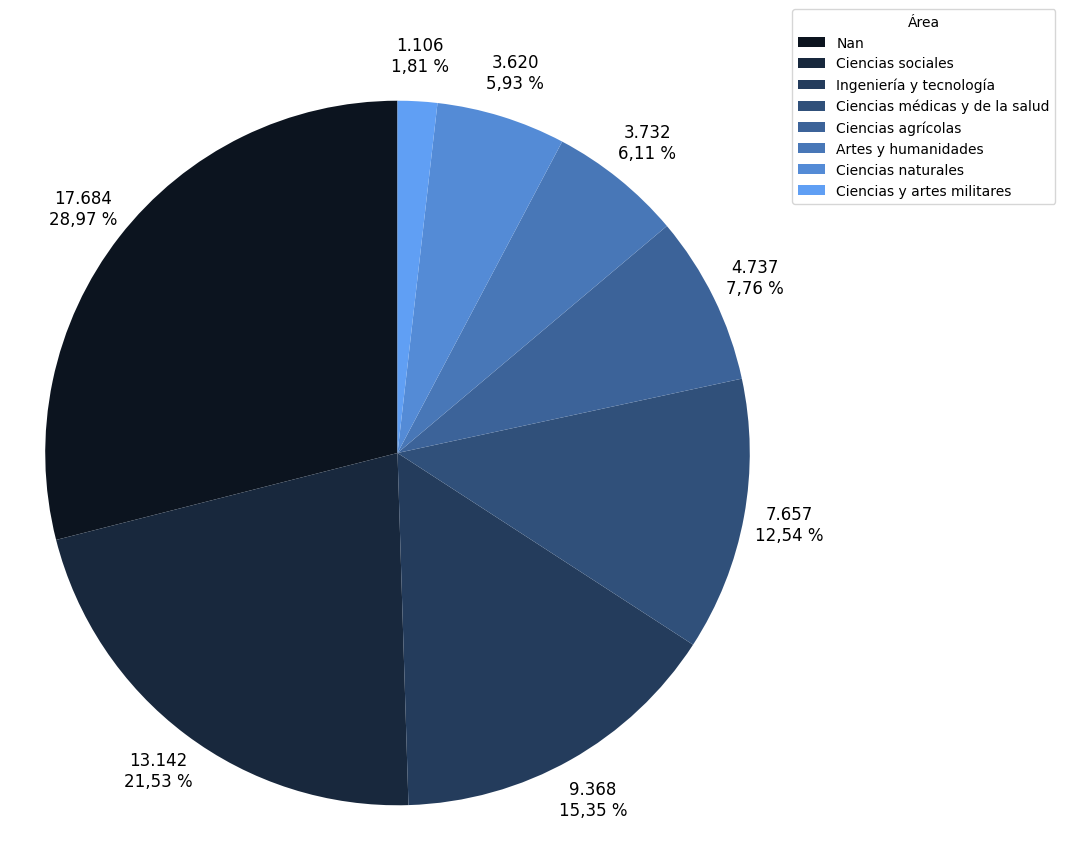

In [ ]:
# prompt: crea un código para generar un gráfico de torta de la columna 'Area', el cual tenga una paleta de colores degradados y las etiquetas de datos con múltiples líneas donde se aprecien los nombres de las categorías, el valor de la categoría y el porcentaje de la misma.

# Suponiendo que 'df' es tu DataFrame y 'Area' es la columna a graficar
columna_a_graficar = 'Área'  # Reemplaza 'Area' con el nombre de tu columna

# Contar la cantidad de valores repetidos
conteo_valores_conocimiento = filtered_df[columna_a_graficar].value_counts()

# Generar colores degradados
base_color = [96, 159, 244]  # Puedes cambiar el color base aquí
colores = generate_gradient_colors(base_color, len(conteo_valores_conocimiento))

# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(conteo_valores_conocimiento.values,
                                  colors=colores,
                                  autopct='',
                                  startangle=90,
                                  textprops={'fontsize': 12})

# Asignando conteo_valores.values a sizes
sizes = conteo_valores_conocimiento.values

# Añadiendo etiqueta de datos a cada porción
for i, label in enumerate(conteo_valores_conocimiento.index):
    # Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # Ajustar la distancia de las etiquetas al centro
    offset = 1.13  # Ajusta este valor para cambiar la distancia

    # Crear la etiqueta con múltiples líneas y separadores de miles (si es necesario)
    ax.text(x * offset, y * offset, f"{colocar_separador_miles(sizes[i])}\n{cambiar_separador(round(sizes[i]/sum(sizes)*100, 2))} %",
            ha='center', va='center', fontsize=12)  # Usa \n para múltiples líneas


# La relación de aspecto uniforme garantiza que el gráfico circular se dibuje como un círculo.
ax.axis('equal')


# Crear la leyenda fuera del gráfico
plt.legend(wedges, conteo_valores_conocimiento.index,
           title="Área",
           loc="center left",
           bbox_to_anchor=(1, 0.45, 0.5, 1))

# Mostrar gráfico
#plt.title('Distribución por Área')  # Agregar un título
plt.show()

Análisis del gráfico anterior

# 8. Fecha de registros por nivel de estudios

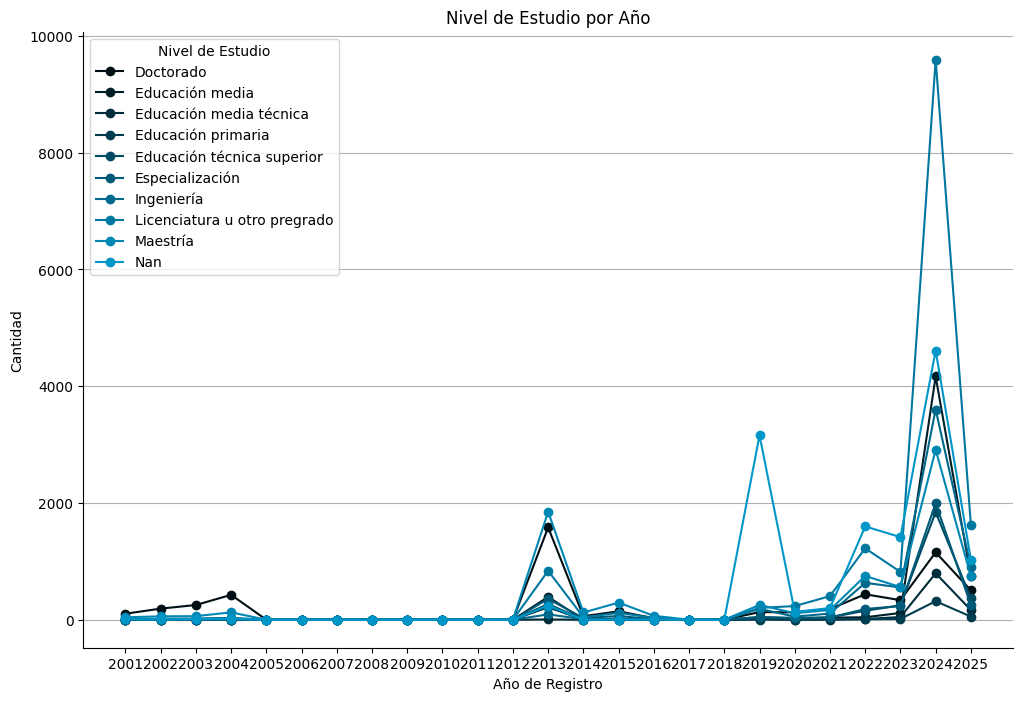

In [ ]:
""""
Prompt:

Objetivo: Visualizar la evolución del número de registros por nivel de estudio a lo largo de los años en un conjunto de datos.

Pasos:

Preparación de los datos:
Convertir la columna 'Fecha de Registro' a formato datetime.
Extraer el año de la fecha de registro y crear una nueva columna.
Crear un DataFrame con todos los años presentes en los datos para asegurar una visualización completa.

Agrupación y conteo:
Agrupar los datos por año y nivel de estudio, contando las ocurrencias de cada combinación.
Reindexar el DataFrame agrupado para incluir todos los años, incluso aquellos sin registros.

Visualización:
Crear un gráfico de líneas de colores degradados para mostrar la evolución del número de registros por nivel de estudio a lo largo del tiempo.
Personalizar el gráfico con título, etiquetas, leyenda y eliminar elementos no necesarios (líneas de cuadrícula, bordes).
Rotar las etiquetas del eje x para mejorar la legibilidad.
"""
from matplotlib.colors import LinearSegmentedColormap



# Convertir 'Fecha de Registro' a objetos datetime si no lo está ya
#filtered_df.loc[:, 'Fecha de Registro'] = pd.to_datetime(filtered_df['Fecha de Registro'], errors='coerce')

filtered_df['Fecha de Registro'] = pd.to_datetime(filtered_df['Fecha de Registro'], errors='coerce')

# Extraer el año de la columna 'Fecha de Registro'
filtered_df.loc[:, 'Año de Registro'] = filtered_df['Fecha de Registro'].dt.year




# Crear un DataFrame con todos los años en el rango de los años existentes en los datos
all_years = pd.DataFrame({'Año de Registro': range(filtered_df['Año de Registro'].min(), filtered_df['Año de Registro'].max() + 1)})

# Agrupar datos por año y nivel de estudio, contando ocurrencias
grouped_data = filtered_df.groupby(['Año de Registro', 'Nivel de Estudio']).size().unstack(fill_value=0)

# Reindexar el DataFrame agrupado para incluir todos los años
grouped_data = grouped_data.reindex(all_years['Año de Registro'], fill_value=0)



# Configurar los colores degradados para las categorías
ba_color = [0, 150, 200]
colors = generate_gradient_colors(ba_color, len(grouped_data.columns))
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(grouped_data.columns))

# Configurar el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos
grouped_data.plot(kind='line', marker='o', ax=ax, colormap=cmap)

# Personalizar el gráfico
plt.title('Nivel de Estudio por Año')
plt.xlabel('Año de Registro')
plt.ylabel('Cantidad')
plt.legend(title='Nivel de Estudio')
#plt.grid(axis='x') # oculta las líneas de cuadrículas horizontales
plt.grid(axis='y')  # oculta las líneas de cuadrículas verticales

# Remover líneas superior y derecha del área del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Asegurar que todos los años estén presentes en el eje X
ax.set_xticks(grouped_data.index)
#plt.xticks(rotation=45)

plt.show()

Preguntas clave para refinar el análisis:

¿Qué tipo de datos contiene la columna 'Nivel de Estudio'? (categórico, numérico, etc.)
¿Cuál es el objetivo principal de este análisis? (identificar tendencias, comparar niveles de estudio, etc.)
¿Hay algún nivel de estudio de particular interés?
¿Se desea agregar más información al gráfico, como porcentajes o valores absolutos?
Posibles extensiones:

Análisis más detallado:
Calcular tasas de crecimiento anual.
Comparar los resultados con otros conjuntos de datos.
Identificar puntos de inflexión o cambios significativos en las tendencias.
Visualizaciones alternativas:
Gráfico de barras apiladas para mostrar la composición de cada año por nivel de estudio.
Mapa de calor para visualizar la relación entre año y nivel de estudio.
Exploración interactiva:
Utilizar herramientas de visualización interactivas (e.g., Plotly, Bokeh) para permitir al usuario explorar los datos de forma dinámica.
Este prompt proporciona una descripción clara y concisa del código, lo que facilita su comprensión y adaptación a diferentes escenarios de análisis de datos.

# 9. Fecha de registros por área de conocimientos

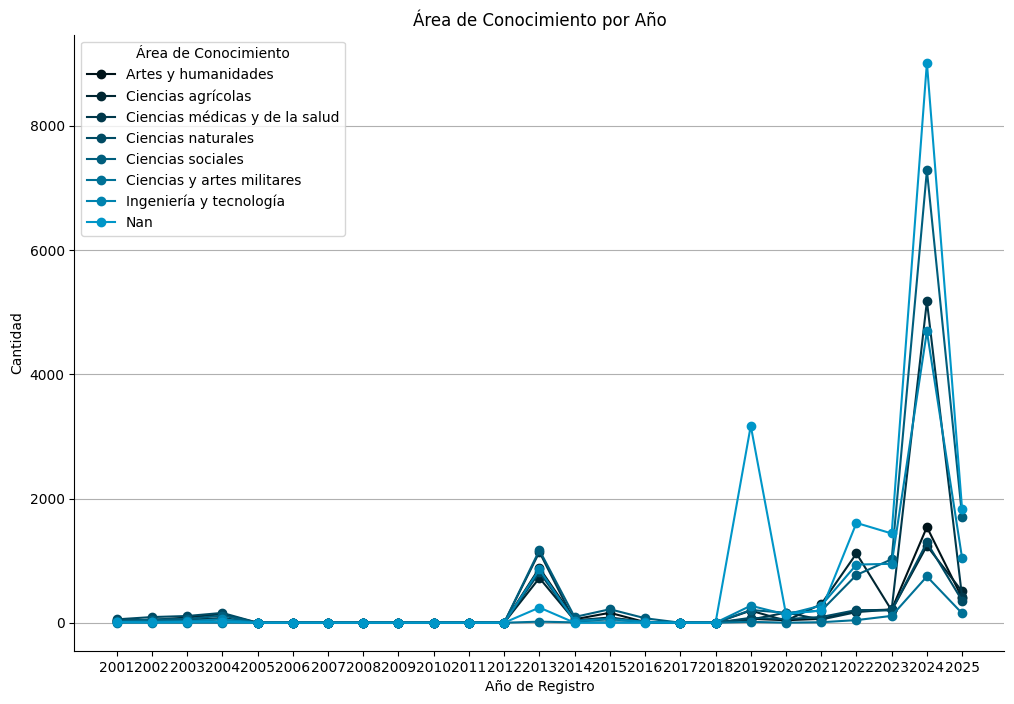

In [ ]:
# prompt: Crea un gráfico de líneas que permita visualizar las cantidades de las categoría de la columna 'Área' respecto a la columna 'Fecha de Registro'

# Convertir 'Fecha de Registro' a objetos datetime si no lo está ya

filtered_df['Fecha de Registro'] = pd.to_datetime(filtered_df['Fecha de Registro'], errors='coerce')
#filtered_df.loc[:, 'Fecha de Registro'] = pd.to_datetime(filtered_df['Fecha de Registro'])

# Extraer el año de la columna 'Fecha de Registro'
filtered_df.loc[:, 'Año de Registro'] = filtered_df['Fecha de Registro'].dt.year

# Crear un DataFrame con todos los años en el rango de los años existentes en los datos
all_years = pd.DataFrame({'Año de Registro': range(filtered_df['Año de Registro'].min(), filtered_df['Año de Registro'].max() + 1)})

# Agrupar datos por año y área de conocimiento, contando ocurrencias
grouped_data = filtered_df.groupby(['Año de Registro', 'Área']).size().unstack(fill_value=0)

# Reindexar el DataFrame agrupado para incluir todos los años
grouped_data = grouped_data.reindex(all_years['Año de Registro'], fill_value=0)

# Configurar los colores degradados para las categorías
ba_color = [0, 150, 200]
colors = generate_gradient_colors(ba_color, len(grouped_data.columns))
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(grouped_data.columns))

# Configurar el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos
grouped_data.plot(kind='line', marker='o', ax=ax, colormap=cmap)

# Personalizar el gráfico
plt.title('Área de Conocimiento por Año')
plt.xlabel('Año de Registro')
plt.ylabel('Cantidad')
plt.legend(title='Área de Conocimiento')
plt.grid(axis='y')  # Oculta las líneas de cuadrícula verticales

# Remover líneas superior y derecha del área del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Asegurar que todos los años estén presentes en el eje X
ax.set_xticks(grouped_data.index)
#plt.xticks(rotation=45)

plt.show()

Análisis del gráfico anterior

In [ ]:
"""# prompt: escribe un código para hacer un merge entre el dataframe 'filtered_df' y el dataframe 'productividad', pero antes cambie el nombre de la columna 'Cédula' del dataframe 'productividad' por 'Cedula de identidad', y luego realice el merge por esa misma columna y lo exporte a excel

# Cambiar el nombre de la columna 'Cédula' a 'Cedula de identidad' en el DataFrame 'productividad'
productividad.rename(columns={'Cédula': 'Cedula de identidad'}, inplace=True)

# Realizar el merge de los DataFrames 'filtered_df' y 'productividad' por la columna 'Cedula de identidad'
merged_df = pd.merge(filtered_df, productividad, on='Cedula de identidad', how='left')

# Exportar el DataFrame resultante a un archivo Excel
merged_df.to_excel('merged_data.xlsx', index=False)

# Descargar el archivo desde Google Colab
from google.colab import files
files.download('merged_data.xlsx')
"""

"# prompt: escribe un código para hacer un merge entre el dataframe 'filtered_df' y el dataframe 'productividad', pero antes cambie el nombre de la columna 'Cédula' del dataframe 'productividad' por 'Cedula de identidad', y luego realice el merge por esa misma columna y lo exporte a excel\n\n# Cambiar el nombre de la columna 'Cédula' a 'Cedula de identidad' en el DataFrame 'productividad'\nproductividad.rename(columns={'Cédula': 'Cedula de identidad'}, inplace=True)\n\n# Realizar el merge de los DataFrames 'filtered_df' y 'productividad' por la columna 'Cedula de identidad'\nmerged_df = pd.merge(filtered_df, productividad, on='Cedula de identidad', how='left')\n\n# Exportar el DataFrame resultante a un archivo Excel\nmerged_df.to_excel('merged_data.xlsx', index=False)\n\n# Descargar el archivo desde Google Colab\nfrom google.colab import files\nfiles.download('merged_data.xlsx')\n"